In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
base_path="/Users/sijiawu/Work/Thesis/Data"

In [3]:
merged=pd.read_pickle(base_path+"/Combined/011_merged_proc_scopus_inception_2020.pkl")
summary=pd.read_csv(base_path+"/Combined/011_scopus_match_summary.csv")
sc_summary=pd.read_csv(base_path+"/Combined/011_scopus_summary.csv")

In [4]:
content_ex=['MISC',  'Discussion', 'Review', 'Review2',"Errata"]
content=['Article', 'Comment', 'Reply', 'Rejoinder']
jid=["aer","ecta","jpe","qje","res"]

In [5]:
merged[merged.duplicated(subset=['URL'])].to_excel("duplicated.xlsx", index=True)

In [6]:

def plot_chart(year_lim, field):
    # Create a figure with 2 columns and 3 rows of subplots
    fig, axs = plt.subplots(3, 2, figsize=(20, 15))
    title_ad=field
    if field == 'scopus_id':
        title_ad="general scopus"
    # Example content for the subplots
    for i, ax in enumerate(axs.flat, start=1):
        if i == 1:
            dta=merged[(merged['content_type'].isin(content)==True) 
                    & (merged['year']>=year_lim)
                    & (merged['jid'].isin(jid))
                    ]['year'].value_counts()
            ax.bar(dta.index,dta, label='Articles', alpha=0.4)
            ax.set_title(f"Top 5 Aggregated coverage for {title_ad} coverage")
            if field=='scopus_id':
                dta2=merged[(merged[field].isnull()==False)&(merged['content_type'].isin(content)==True) 
                        & (merged['year']>=year_lim)
                        & (merged['jid'].isin(jid))
                        ]['year'].value_counts()
            else:
                dta2=merged[(merged[field]==True)&(merged['content_type'].isin(content)==True) 
                        & (merged['year']>=year_lim)
                        & (merged['jid'].isin(jid))
                        ]['year'].value_counts()
            ax.bar(dta2.index, dta2, label='Scopus coverage', alpha=0.4)
        else:
            plt.rcParams["figure.figsize"] = (20, 8)
            dta=merged[(merged['content_type'].isin(content)==True) 
                    & (merged['year']>=year_lim)
                    & (merged['jid'].isin([jid[i-2]]))
                    ]['year'].value_counts()
            ax.bar(dta.index,dta, label='Articles', alpha=0.4)
            # ax.plot([0, 1, 2], [i, i**2, i**3])  # Example plot
            ax.set_title(f"{jid[i-2].upper()} {field} coverage")

            if field=='scopus_id':
                dta2=merged[(merged[field].isnull()==False)&(merged['content_type'].isin(content)==True) 
                        & (merged['year']>=year_lim)
                        & (merged['jid'].isin([jid[i-2]]))
                        ]['year'].value_counts()
            else:
                dta2=merged[(merged[field]==True)&(merged['content_type'].isin(content)==True) 
                        & (merged['year']>=year_lim)
                        & (merged['jid'].isin([jid[i-2]]))
                        ]['year'].value_counts()
            ax.bar(dta2.index, dta2, label='Scopus coverage', alpha=0.4)
            ax.set_ylim(0, 260) 
        ax.legend()
    # Adjust layout to prevent overlap
    
    plt.tight_layout()
    plt.show()

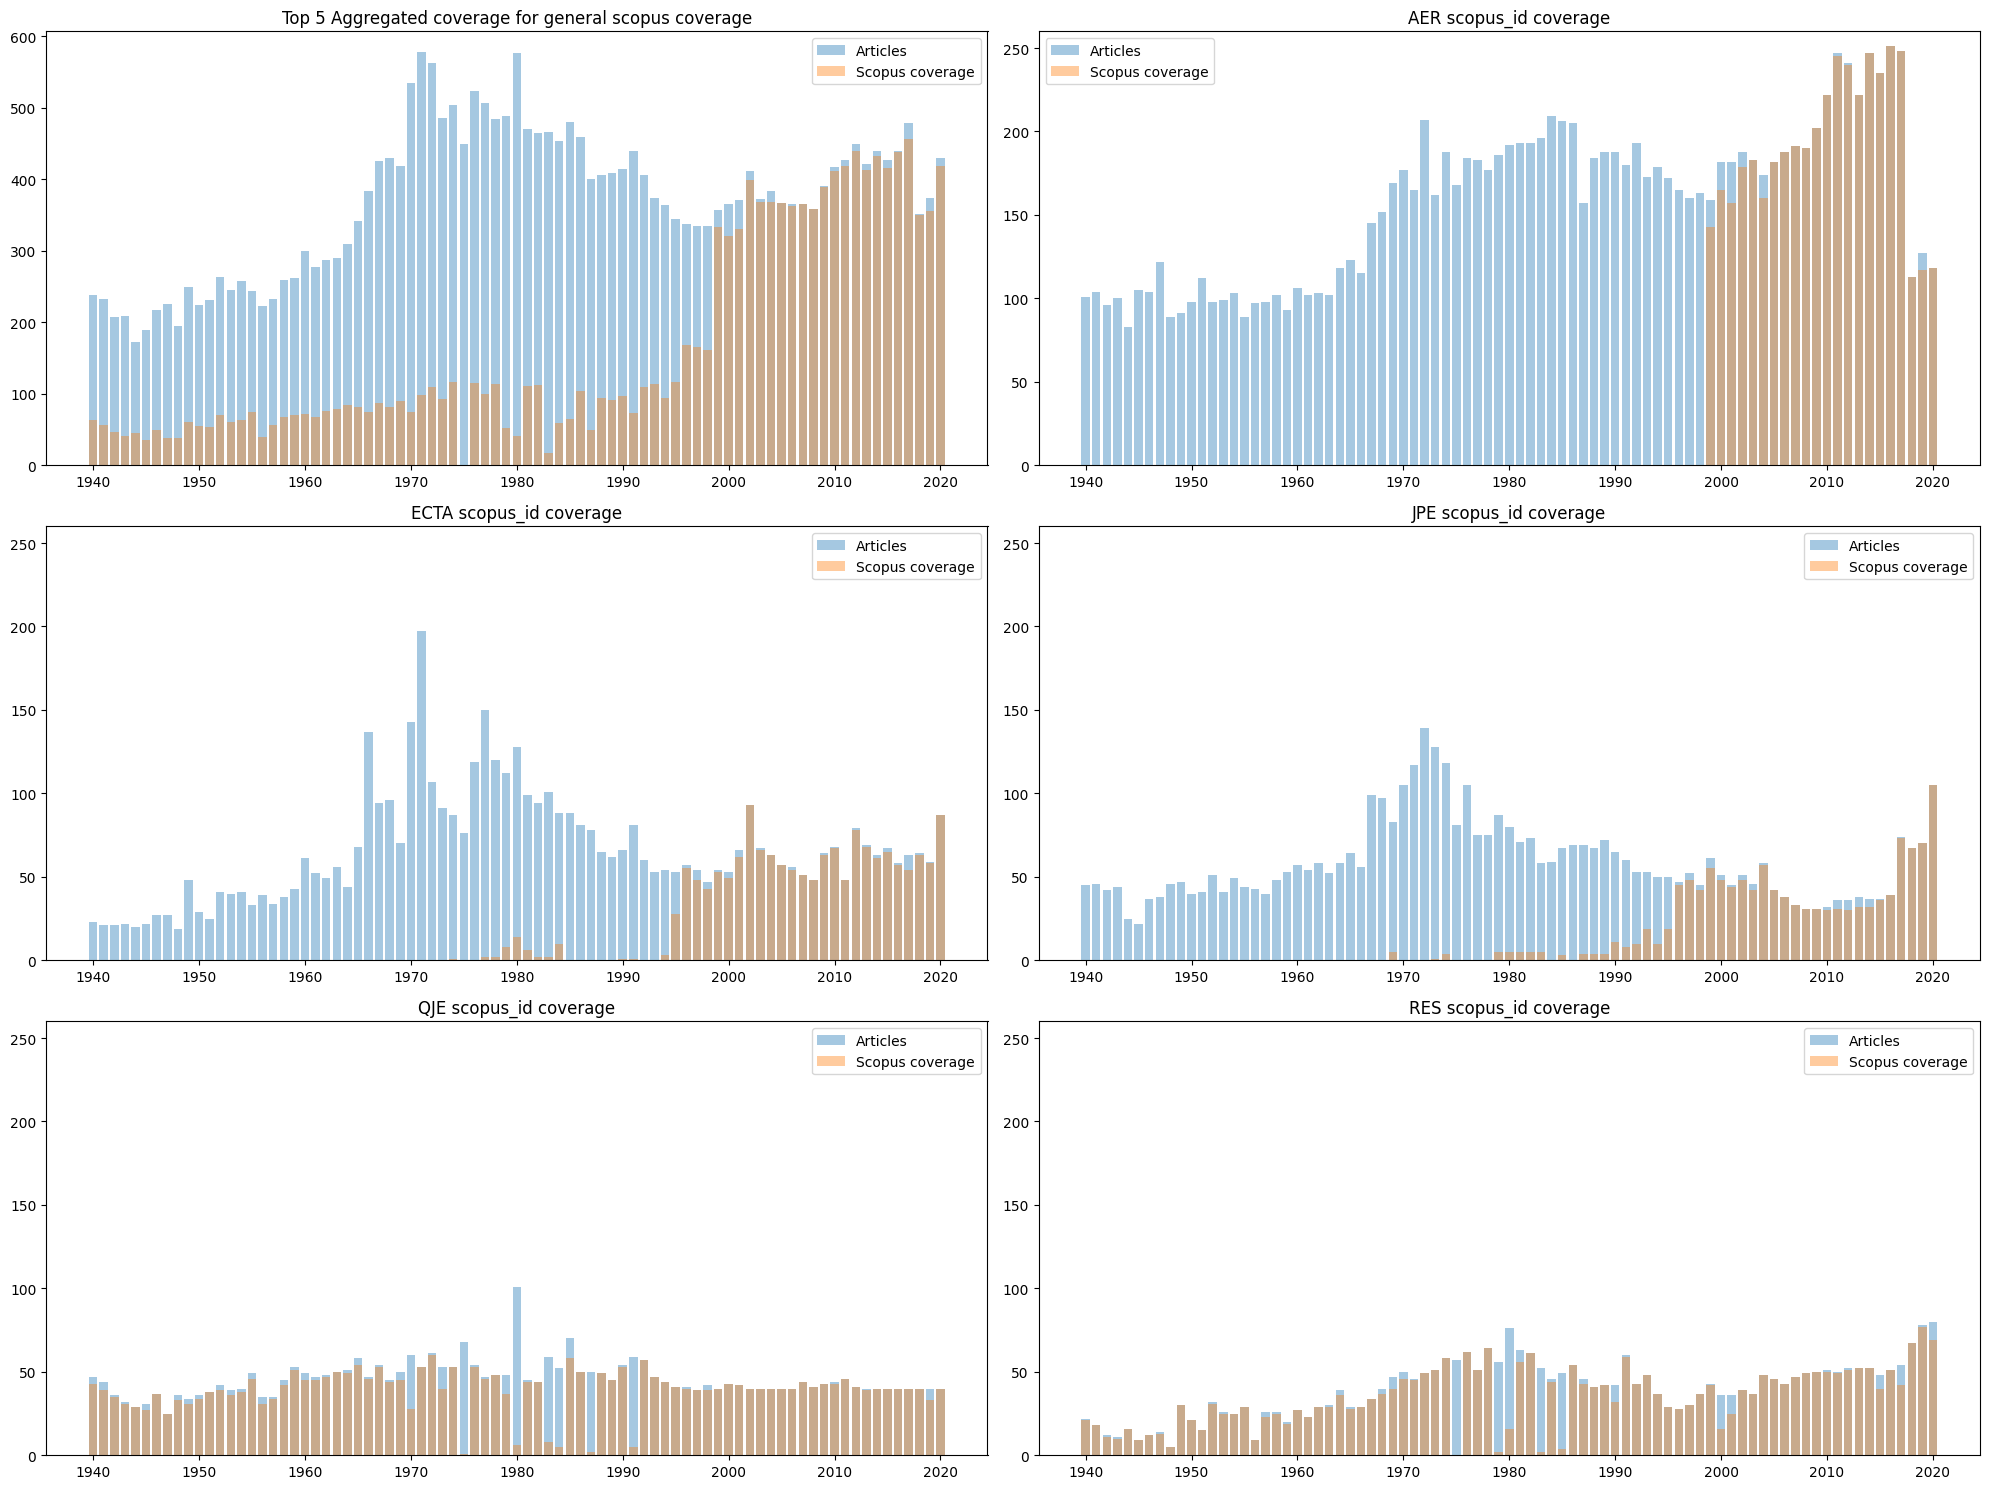

In [7]:
plot_chart(1940, "scopus_id")


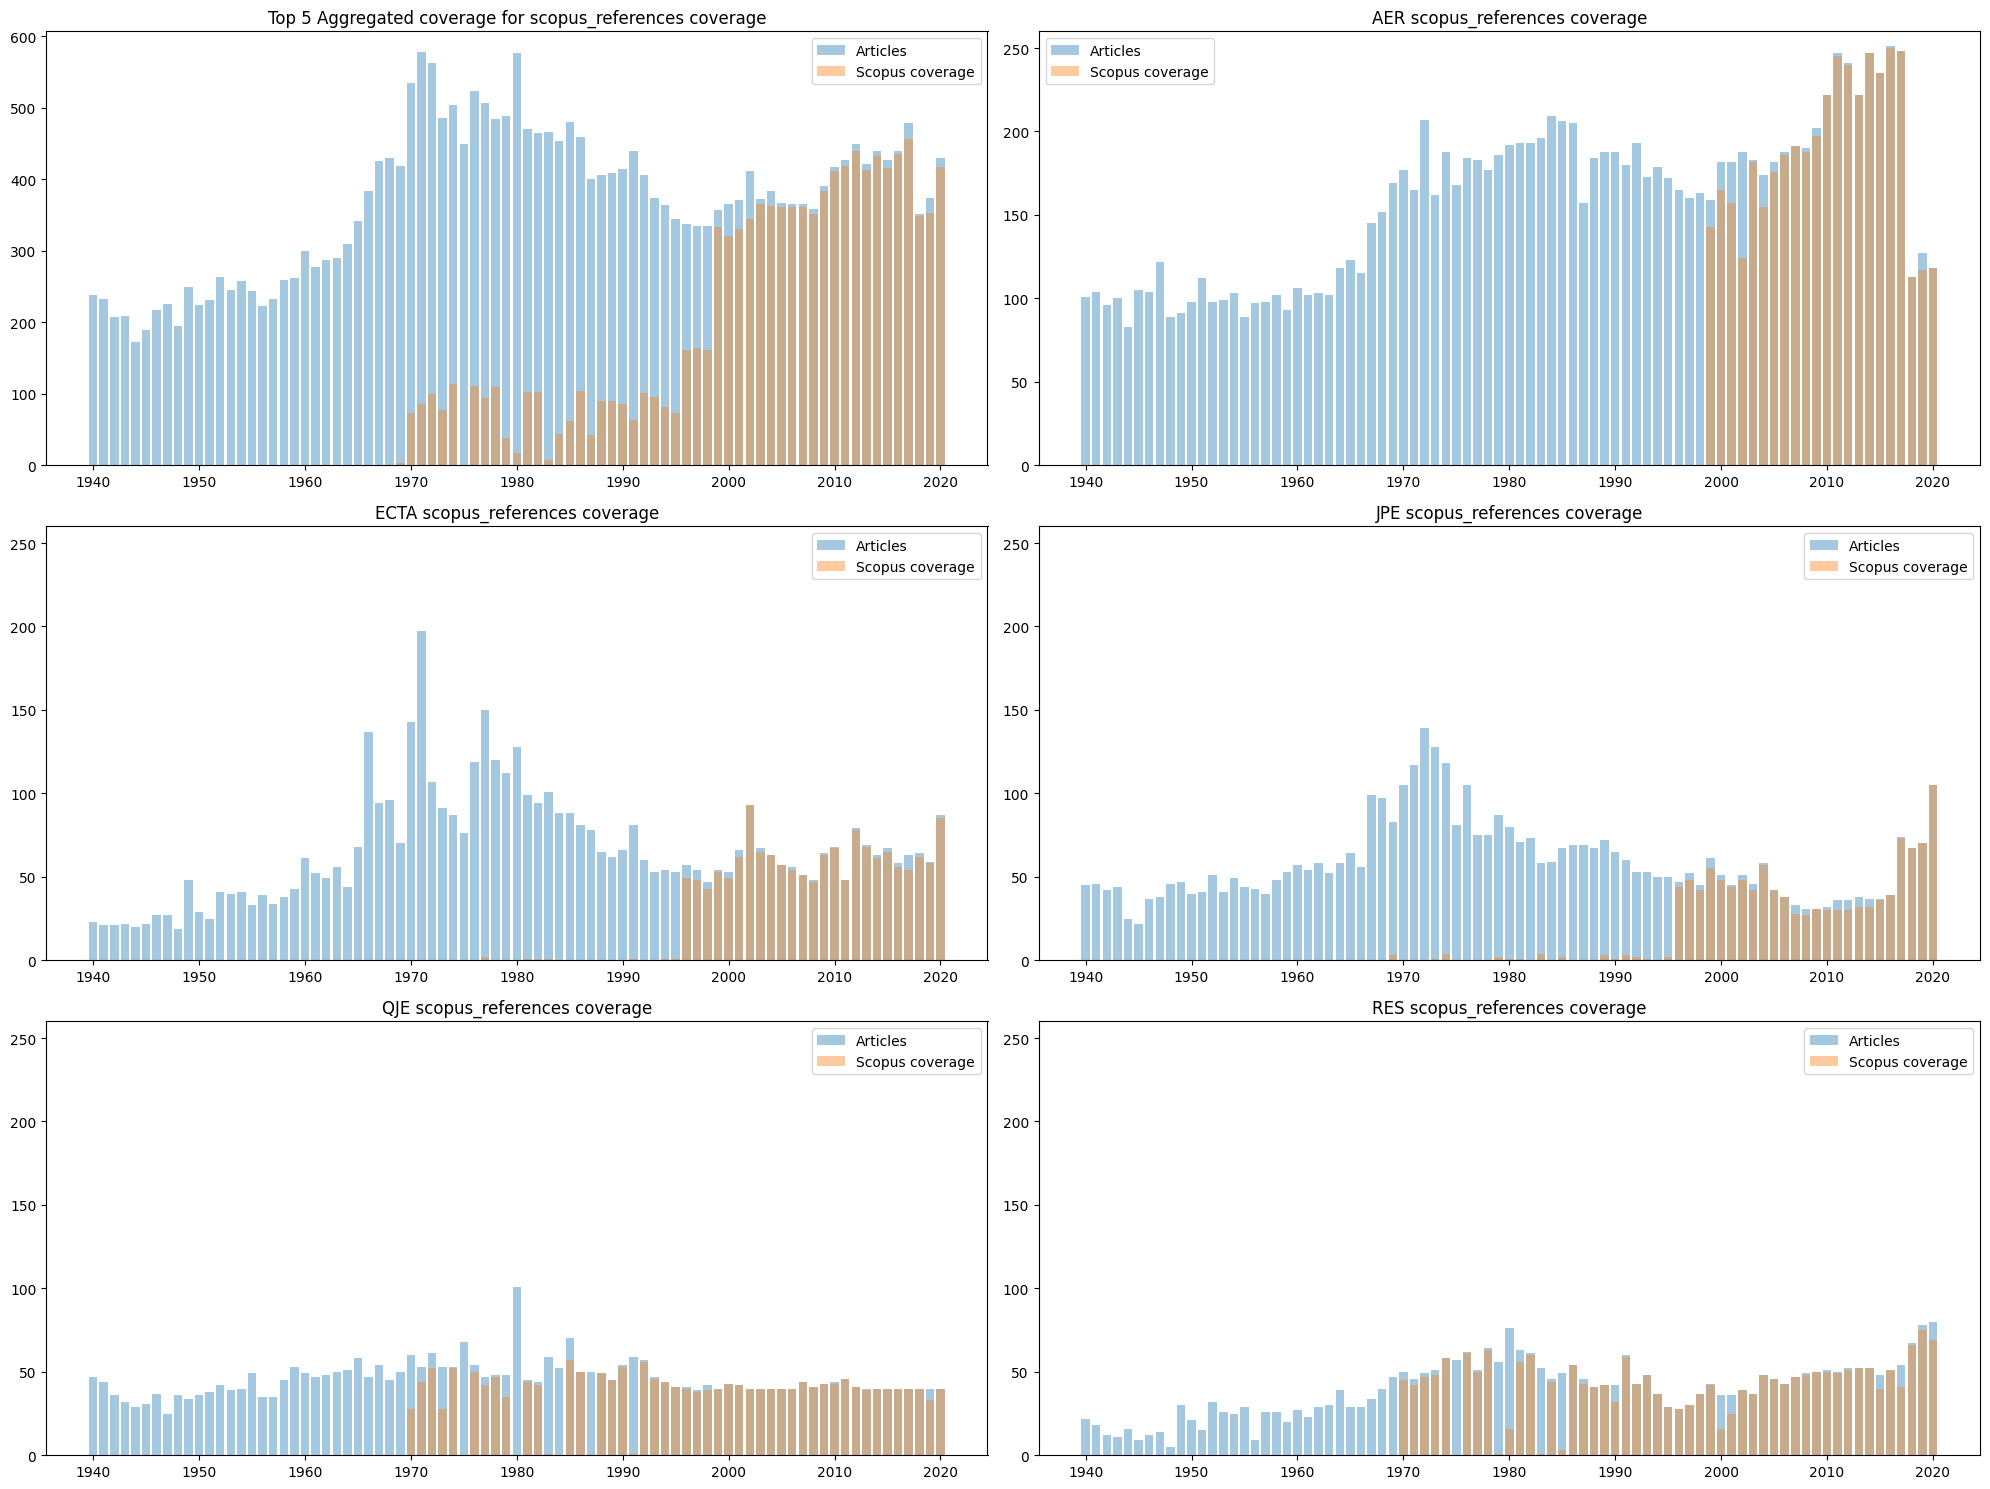

In [8]:
plot_chart(1940, "scopus_references")

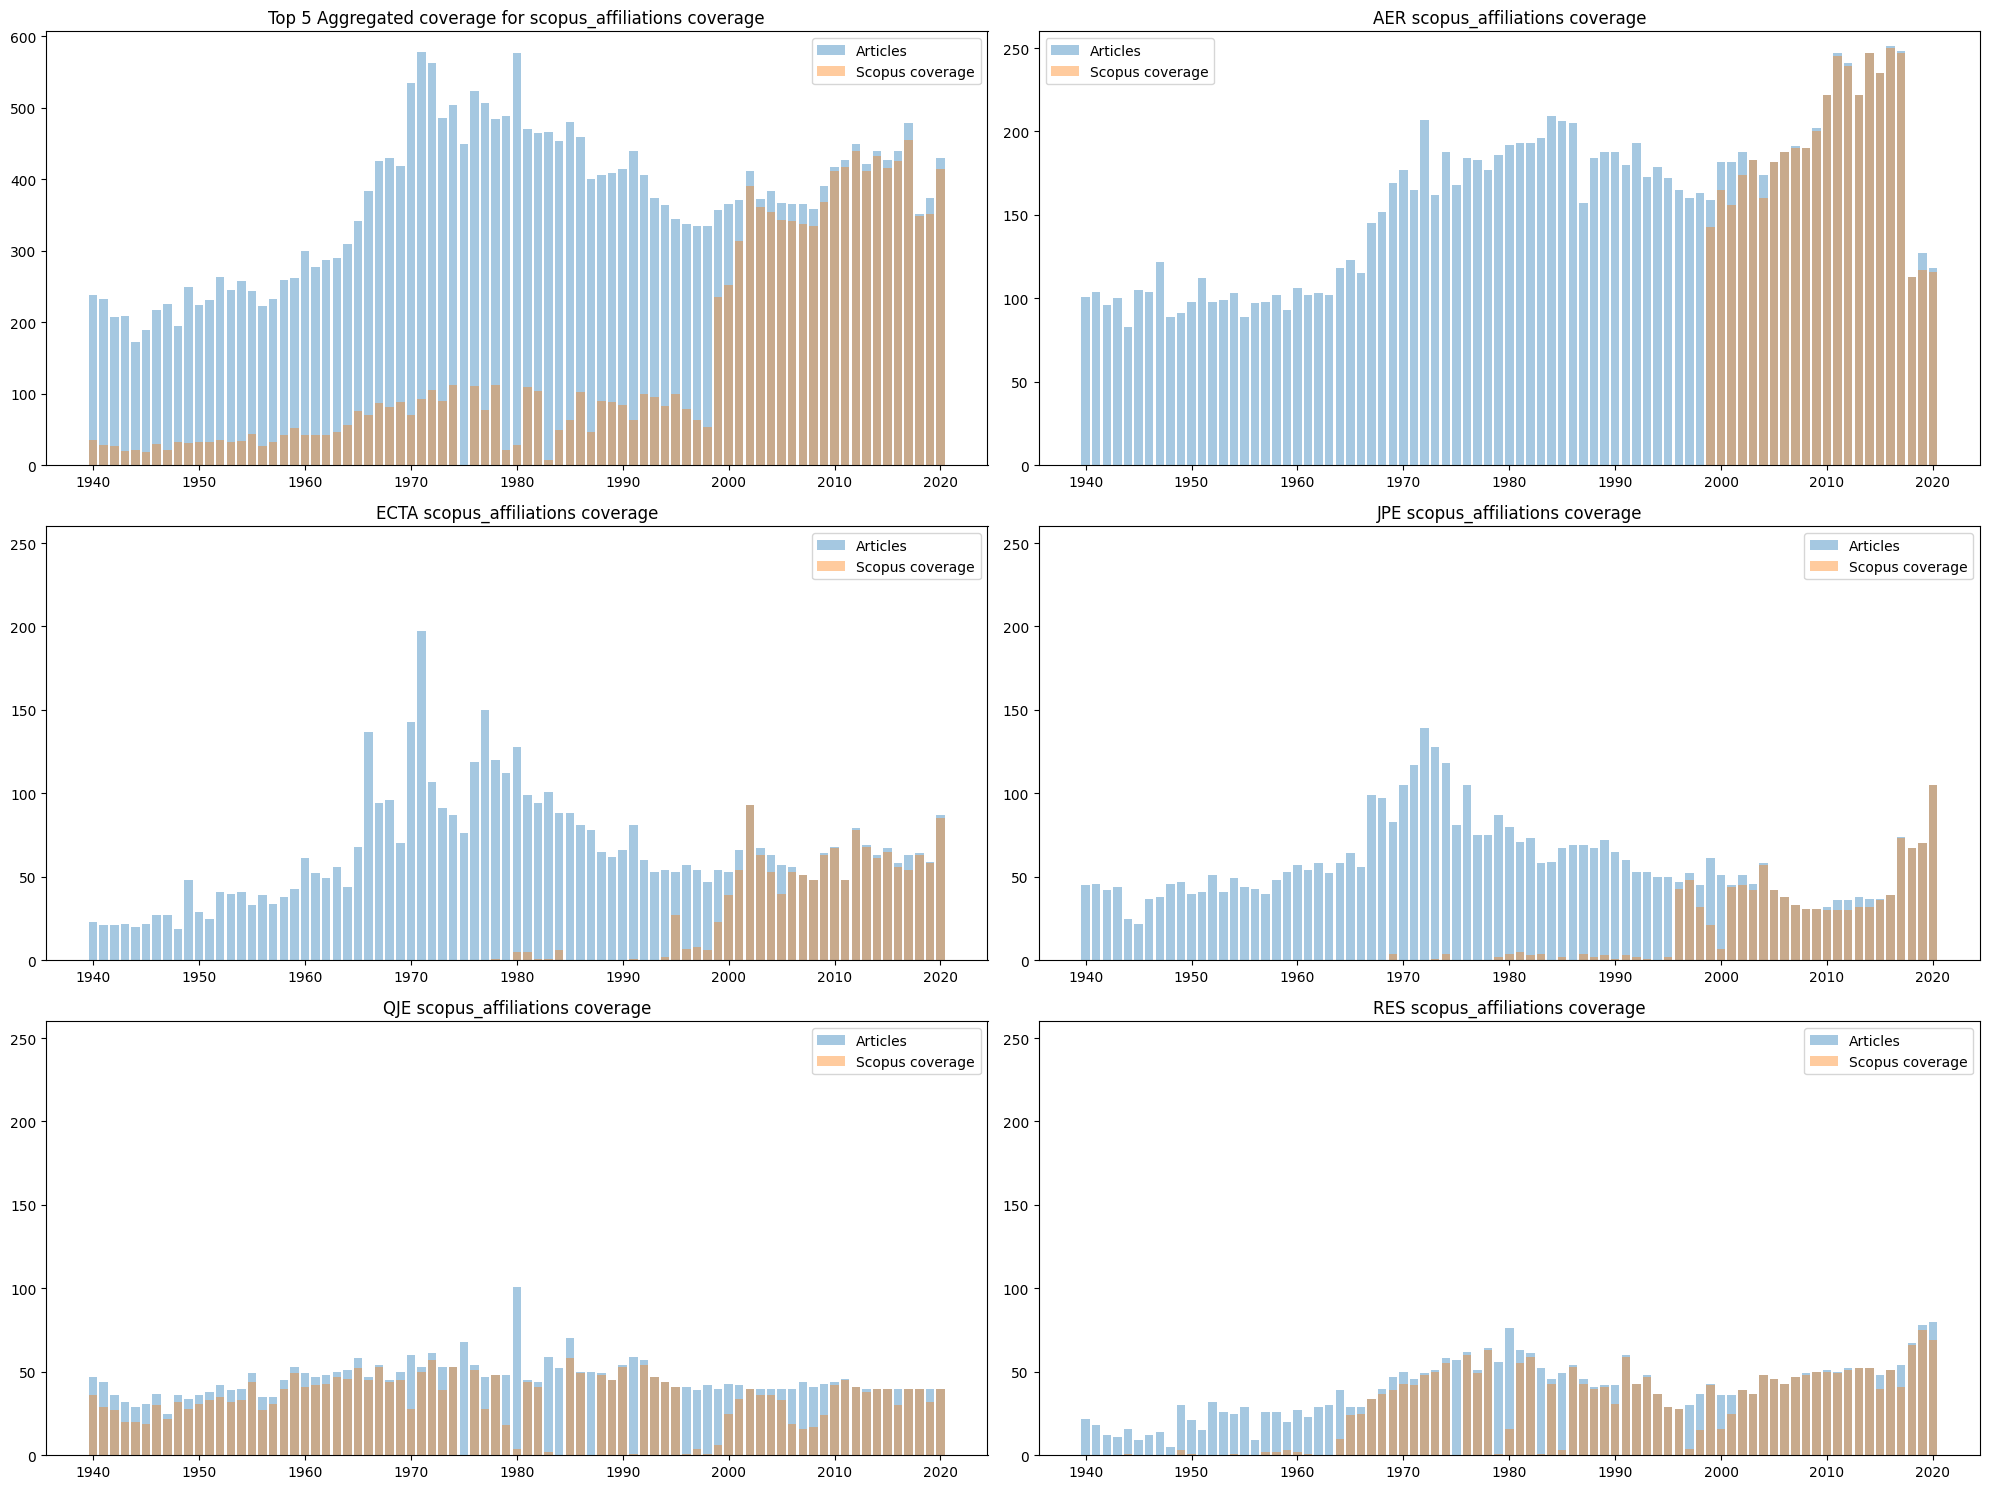

In [9]:
plot_chart(1940, "scopus_affiliations")


In [10]:
summary

,journal,jstor <=2020,scopus <=2020,matches*,match %,2020>= NMR >=1940,2020>= NMR >=1940 matches,2020>= NMR >=1940 match %
0,aer,27564,4360,4225,15.3280,12804,4198,32.7866
1,ecta,9339,1633,1605,17.1860,5348,1591,29.7494
2,jpe,14345,1293,1290,8.9927,4768,1276,26.7617
3,res,4140,3037,3019,72.9227,3242,2855,88.0629
4,qje,6869,4502,4485,65.2933,3700,3187,86.1351


In [11]:
sc_summary

,journal,articles on scopus,article year > 2020,ignored misc articles,discarded metadata with errors,scopus match candidates,match %,many scopus one jstor,many jstor one scopus,direct match,scopus matched,scopus match on adj,scopus approx. matched,scopus unmatched
0,aer,4360,0,129,12,4219,96.7661,2,4,1,4004,81,127,0
1,ecta,1910,277,27,1,1605,98.2854,0,0,1,1541,26,37,0
2,jpe,1542,249,1,2,1290,99.7680,0,0,5,1183,44,58,0
3,res,3339,302,3,15,3019,99.4073,6,0,13,2682,154,164,0
4,qje,4502,0,4,14,4484,99.6002,32,1,25,3968,262,196,0


In [12]:
NMR_post_40=merged[(merged['year']>=1940)&(merged['content_type'].isin(content)==True)].reset_index(drop=True)


In [13]:
scopus_summary=[]
for i in jid:
    nmr=NMR_post_40[NMR_post_40['jid']==i].shape[0]
    af=NMR_post_40[(NMR_post_40['jid']==i)&(NMR_post_40['scopus_affiliations']==True)].shape[0]/nmr
    ar=NMR_post_40[(NMR_post_40['jid']==i)&(NMR_post_40['scopus_references']==True)].shape[0]/nmr
    gen=NMR_post_40[(NMR_post_40['jid']==i)&(NMR_post_40['scopus_id'].isna()==False)].shape[0]/nmr

    scopus_summary.append({
        "journal": i,
        # "total articles to 2020": merged[merged['jid']==i].shape[0],
        "post-1940 articles": NMR_post_40[NMR_post_40['jid']==i].shape[0],
        "scopus entry match": NMR_post_40[(NMR_post_40['jid']==i)&(NMR_post_40['scopus_id'].isna()==False)].shape[0],
        "scopus general coverage %": f"{gen*100:.4f}",
        "scopus affiliations coverage %": f"{af*100:.4f}",
        "scopus references coverage %": f"{ar*100:.4f}",
        # "unmatched scopus articles post 1940": temp[temp['scopus_year'].isin(year_range)==True].shape[0],
    })

nmr=NMR_post_40.shape[0]
af=NMR_post_40[(NMR_post_40['scopus_affiliations']==True)].shape[0]/nmr
ar=NMR_post_40[(NMR_post_40['scopus_references']==True)].shape[0]/nmr
gen=NMR_post_40[(NMR_post_40['scopus_id'].isna()==False)].shape[0]/nmr
scopus_summary.append({
        "journal": "Aggregated",
        # "total articles to 2020": merged[merged['jid']==i].shape[0],
        "post-1940 articles": NMR_post_40.shape[0],
        "scopus entry match": NMR_post_40[(NMR_post_40['scopus_id'].isna()==False)].shape[0],
        "scopus general coverage %": f"{gen*100:.4f}",
        "scopus affiliations coverage %": f"{af*100:.4f}",
        "scopus references coverage %": f"{ar*100:.4f}",
        # "unmatched scopus articles post 1940": temp[temp['scopus_year'].isin(year_range)==True].shape[0],
    })
pd.DataFrame(scopus_summary)

,journal,post-1940 articles,scopus entry match,scopus general coverage %,scopus affiliations coverage %,scopus references coverage %
0,aer,12804,4198,32.7866,32.6773,32.1853
1,ecta,5348,1591,29.7494,25.2992,28.1788
2,jpe,4768,1276,26.7617,23.1753,24.4966
3,qje,3700,3187,86.1351,72.9459,51.8649
4,res,3242,2855,88.0629,70.3270,66.4713
5,Aggregated,29862,13107,43.8919,38.9157,36.4008


In [14]:
NMR_post_20=merged[(merged['year']>=2010)&(merged['content_type'].isin(content)==True)].reset_index(drop=True)

In [15]:
scopus_summary=[]
for i in jid:
    nmr=NMR_post_20[NMR_post_20['jid']==i].shape[0]
    af=NMR_post_20[(NMR_post_20['jid']==i)&(NMR_post_20['scopus_affiliations']==True)].shape[0]/nmr
    ar=NMR_post_20[(NMR_post_20['jid']==i)&(NMR_post_20['scopus_references']==True)].shape[0]/nmr
    gen=NMR_post_20[(NMR_post_20['jid']==i)&(NMR_post_20['scopus_id'].isna()==False)].shape[0]/nmr

    scopus_summary.append({
        "journal": i,
        # "total articles to 2020": merged[merged['jid']==i].shape[0],
        "post-2010 articles": NMR_post_20[NMR_post_20['jid']==i].shape[0],
        "scopus entry match": NMR_post_20[(NMR_post_20['jid']==i)&(NMR_post_20['scopus_id'].isna()==False)].shape[0],
        "scopus general coverage %": f"{gen*100:.4f}",
        "scopus affiliations coverage %": f"{af*100:.4f}",
        "scopus references coverage %": f"{ar*100:.4f}",
        # "unmatched scopus articles post 1940": temp[temp['scopus_year'].isin(year_range)==True].shape[0],
    })

pd.DataFrame(scopus_summary)

,journal,post-2010 articles,scopus entry match,scopus general coverage %,scopus affiliations coverage %,scopus references coverage %
0,aer,2271,2258,99.4276,99.2074,99.3835
1,ecta,725,706,97.3793,96.9655,96.8276
2,jpe,571,545,95.4466,95.2715,95.2715
3,qje,451,442,98.0044,94.9002,98.0044
4,res,635,600,94.4882,93.8583,93.8583


In [16]:
na_scopus_20=NMR_post_20[NMR_post_20['scopus_id'].isna()==True].reset_index(drop=True)

In [17]:
na_scopus_20.shape

(102, 60)

In [18]:
jstor_summary=[]
content_types=list(merged["content_type"].unique())
for i in jid:
    total=len(merged[(merged['jid']==i)&(merged['year']>=1940)]["URL"].unique())
    entry={
        "journal": i,
        "1940<=articles<=2020": total,
    }
    for j in content_types:
        entry[j]=len(merged[(merged['jid']==i)&(merged['content_type']==j)&(merged['year']>=1940)]["URL"].unique())
    relevant=len(merged[(merged['jid']==i)&(merged['content_type'].isin(content))&(merged['year']>=1940)]["URL"].unique())*100/total
    entry["Relevant %"]=f"{relevant:.4f}"
    jstor_summary.append(entry)

total=len(merged[(merged['year']>=1940)]["URL"].unique())
entry={
    "journal": "Aggregated",
    "1940<=articles<=2020": total,
}
for j in content_types:
    entry[j]=len(merged[(merged['content_type']==j)&(merged['year']>=1940)]["URL"].unique())
relevant=len(merged[(merged['content_type'].isin(content))&(merged['year']>=1940)]["URL"].unique())*100/total
entry["Relevant %"]=f"{relevant:.4f}"
jstor_summary.append(entry)

jsum=pd.DataFrame(jstor_summary)

In [19]:
content

['Article', 'Comment', 'Reply', 'Rejoinder']

In [20]:
jsum

,journal,1940<=articles<=2020,Article,MISC,Comment,Reply,Errata,Rejoinder,Discussion,Review,Review2,Relevant %
0,aer,20756,11431,3031,836,490,11,46,575,4336,0,61.6834
1,ecta,8981,5224,2725,73,41,7,10,9,892,0,59.5479
2,jpe,8784,4467,1236,162,100,13,38,1,2763,4,54.2691
3,qje,4559,3296,845,249,133,18,15,0,3,0,81.0046
4,res,3948,3162,683,59,11,26,7,0,0,0,82.0415
5,Aggregated,47028,27580,8520,1379,775,75,116,585,7994,4,63.4728


In [21]:
jsum['Review']=jsum['Review']+jsum['Review2']
jsum=jsum.drop(columns=["Review2"])

In [22]:
jsum.to_csv(base_path+"/Combined/012_jstor_summary.csv", index=False)

In [23]:
jsum

,journal,1940<=articles<=2020,Article,MISC,Comment,Reply,Errata,Rejoinder,Discussion,Review,Relevant %
0,aer,20756,11431,3031,836,490,11,46,575,4336,61.6834
1,ecta,8981,5224,2725,73,41,7,10,9,892,59.5479
2,jpe,8784,4467,1236,162,100,13,38,1,2767,54.2691
3,qje,4559,3296,845,249,133,18,15,0,3,81.0046
4,res,3948,3162,683,59,11,26,7,0,0,82.0415
5,Aggregated,47028,27580,8520,1379,775,75,116,585,7998,63.4728
